Write a python program to find the polynomials of degrees n= 3,7,15,21 that approximate f(x) = 1/(1+x^2)  from  60 points of this function corresponding to 60 equidistant x  points in the interval [-5,5].  Apply calculus and gradient methods to find the polynomial approximations.  Draw polynomials from each method and data in the same graph.

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate 60 equidistant x points in the interval [-5, 5]

In [2]:
x = np.linspace(-5, 5, 60)

Generate the y values for the 60 x points

In [3]:
y = 1 / (1 + x**2)

Define the degrees of the polynomials to be found

In [4]:
degrees = [3, 7, 15, 21]

Gradient descent and defined the arrays

In [5]:
alpha = 1e-3
max_iter = 100
eps = 1e-4
polynomials_calculus = []
polynomials_gradient = []

Calculate the polynomial regression using both calculus-based and gradient-based methods.

In [6]:
for degree in degrees:
    polyfit_calculus = np.polyfit(x,y,degree)
    polyfit_gradient = polyfit_calculus.copy()
    
    for i in range(max_iter):
        y_calculated = np.polyval(polyfit_calculus, x)
        loss = ((y_calculated - y)**2).mean()
        if loss < eps:
            break
        gradient = np.polyval(np.polyder(polyfit_gradient), x)
        x_matrix = np.vstack([x ** i for i in range(degree + 1)])
        polyfit_gradient -= alpha * np.matmul(x_matrix, gradient * (y_calculated - y))

    polynomials_calculus.append(polyfit_calculus)
    polynomials_gradient.append(polyfit_gradient)

Make the plot

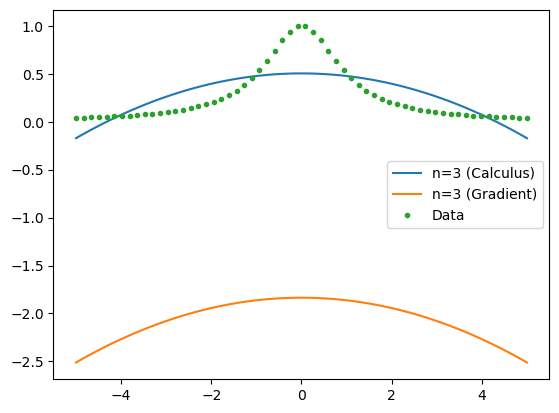

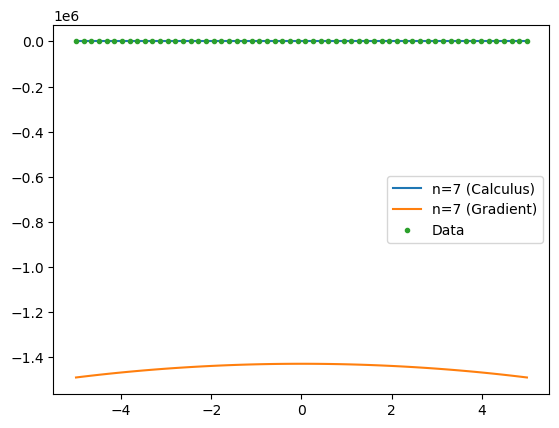

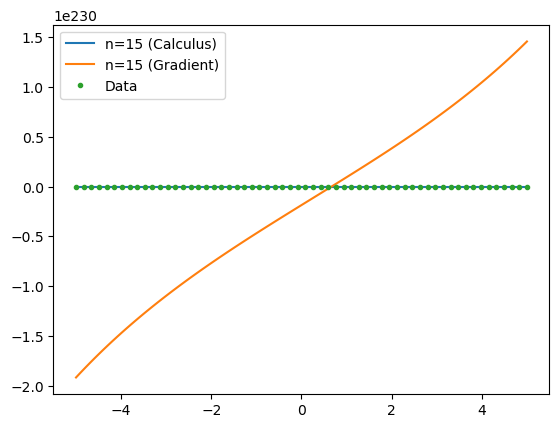

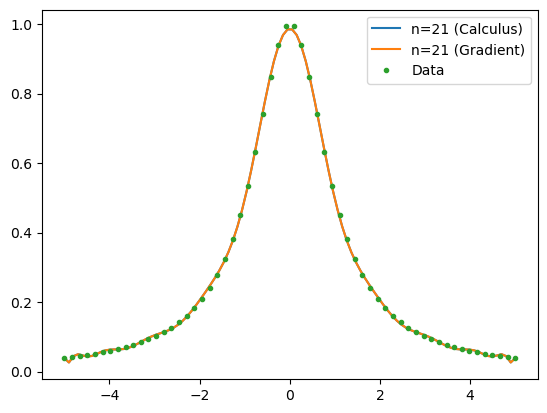

In [7]:
x_range = np.linspace(-5, 5, 100)
for i, degree in enumerate(degrees):
    y_range_calculus = np.polyval(polynomials_calculus[i], x_range)
    y_range_gradient = np.polyval(polynomials_gradient[i], x_range)
    plt.figure()
    plt.plot(x_range, y_range_calculus, label=f'n={degree} (Calculus)')
    plt.plot(x_range, y_range_gradient, label=f'n={degree} (Gradient)')
    plt.plot(x, y, '.', label='Data')
    plt.legend()
    plt.show()